In [3]:
import os
import math
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as pd

# 1- Indexing - (I)

## 1.1- Examples
* Select items using:
  * index, ``x[4]``
  * list of indices: ``x[[2,3,14]]``
  * mask: ``x[x >= 10]``

### 1.1.1- Example1 - with 1D

In [4]:
# declare variables
N = 15

# generate N integers
np.random.seed(0)
x = np.random.randint(0, 50, (N,))

# select items using their indices
np.set_printoptions(formatter={'float': '{:<0.3f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
print("index:\t", np.arange(N))
print("x: \t", x)
print("To select item at index 4: ", x[4])
print("To select items at indices [2,3,14]: ", x[[2,3,14]])

print('-'*150)
print("index:                                           ", np.arange(N))
print("x:                                               ", x)
print("To create a mask of items >=10 (0=False; 1=True):", x >= 10)
print("To select items using a mask, x >= 10:", x[x >= 10])



index:	 [0   1   2   3   4   5   6   7   8   9   10  11  12  13  14 ]
x: 	 [44  47  0   3   3   39  9   19  21  36  23  6   24  24  12 ]
To select item at index 4:  3
To select items at indices [2,3,14]:  [0   3   12 ]
------------------------------------------------------------------------------------------------------------------------------------------------------
index:                                            [0   1   2   3   4   5   6   7   8   9   10  11  12  13  14 ]
x:                                                [44  47  0   3   3   39  9   19  21  36  23  6   24  24  12 ]
To create a mask of items >=10 (0=False; 1=True): [1   1   0   0   0   1   0   1   1   1   1   0   1   1   1  ]
To select items using a mask, x >= 10: [44  47  39  19  21  36  23  24  24  12 ]


### 1.1.2- Example 2 - with 2D or more dimensions

In [5]:
# declare variables
N, M = 15, 4
# generate N integers
np.random.seed(0)
X = np.random.randint(0, 50, (N,M))

# select items using their indices
np.set_printoptions(formatter={'float': '{:<0.3f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
print("X: \t"); print(X)
print("All the items in row with index 4: ", X[4])
print("All the items in rows [2,3,14]: "); print(X[[2,3,14]])

print('-'*150)
print("Mask of items >=10 (0=False; 1=True):", X >= 10)
print("X[X >= 10]:", X[X >= 10])

print('-'*150)
print('Mask with rows: to select all rows with index > 5:')
mask = np.arange(N) > 5
print('X[mask]:'); print(X[mask])

X: 	
[[44  47  0   3  ]
 [3   39  9   19 ]
 [21  36  23  6  ]
 [24  24  12  1  ]
 [38  39  23  46 ]
 [24  17  37  25 ]
 [13  8   9   20 ]
 [16  5   15  47 ]
 [0   18  35  24 ]
 [49  29  19  19 ]
 [14  39  32  1  ]
 [9   32  31  10 ]
 [23  35  11  28 ]
 [34  0   0   36 ]
 [5   38  40  17 ]]
All the items in row with index 4:  [38  39  23  46 ]
All the items in rows [2,3,14]: 
[[21  36  23  6  ]
 [24  24  12  1  ]
 [5   38  40  17 ]]
------------------------------------------------------------------------------------------------------------------------------------------------------
Mask of items >=10 (0=False; 1=True): [[1   1   0   0  ]
 [0   1   0   1  ]
 [1   1   1   0  ]
 [1   1   1   0  ]
 [1   1   1   1  ]
 [1   1   1   1  ]
 [1   0   0   1  ]
 [1   0   1   1  ]
 [0   1   1   1  ]
 [1   1   1   1  ]
 [1   1   1   0  ]
 [0   1   1   1  ]
 [1   1   1   1  ]
 [1   0   0   1  ]
 [0   1   1   1  ]]
X[X >= 10]: [44  47  39  19  21  36  23  24  24  12  38  39  23  46  24  17  37  25
 13  

## Question-1. Selecting items using index and mask
* Requirements:
  1. Select items with indices specified in ``selected``
  2. Select even numbers in x
  2. Select the items at odd index in x
  3. Show the results as in the output cell

In [6]:
# declare variables
N = 15

# generate N integers
np.random.seed(0)
x = np.random.randint(0, 50, (N,))
selected = [1,5,10]
np.set_printoptions(formatter={'float': '{:<0.3f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
print("index:\t", np.arange(N))
print("x: \t", x)
print('-'*150)

print(f"Items at indices [1,5,10]: {x[[1,5,10]]}")
print(f"Even numbers in x: {x[x % 2 == 0]}")
print(f"Numbers at odd indices in x: {x[np.arange(N) % 2 != 0]}")


index:	 [0   1   2   3   4   5   6   7   8   9   10  11  12  13  14 ]
x: 	 [44  47  0   3   3   39  9   19  21  36  23  6   24  24  12 ]
------------------------------------------------------------------------------------------------------------------------------------------------------
Items at indices [1,5,10]: [47  39  23 ]
Even numbers in x: [44  0   36  6   24  24  12 ]
Numbers at odd indices in x: [47  3   39  19  36  6   24 ]


## Question-2. Selecting rows in matrices
* Requirements:
  1. Select all items are rows specified in ``row_selected``
  2. Select all rows at even indices
  3. ``t`` is an array, and its' length is the same as number of rows of ``X``. Select rows in ``X`` in a way such that the **corresponding value** in ``t`` is greater than 5
  4. ``t`` is an array, and its' length is the same as number of rows of ``X``. Select rows in ``X`` in a way such that the **corresponding value** in ``t`` is equal to 3
  5. Show the results as in the output cell

In [7]:
# declare variables
N, M = 8, 4
# generate N integers
np.random.seed(0)
X = np.random.randint(0, 50, (N,M))
row_selected = [2, 0, 1]
t = np.array([0, 10, 2, 3, 6, 7, 3, 5])

# select items using their indices
np.set_printoptions(formatter={'float': '{:<0.3f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
print("X: \t"); print(X)
print("row_selected: ", row_selected)
print("t: ", t)
print('-'*150)
print("Rows with indices in row_selected:")
print(f"{X[[row_selected]]}")
print("Row with even indices:")
index_array = np.arange(8).reshape(1,8)
print(f"{X[index_array[index_array % 2 == 0]]}")
print("Rows where t > 5")
print(X[t > 5])
print("Rows where t == 3")
print(X[t == 3])

X: 	
[[44  47  0   3  ]
 [3   39  9   19 ]
 [21  36  23  6  ]
 [24  24  12  1  ]
 [38  39  23  46 ]
 [24  17  37  25 ]
 [13  8   9   20 ]
 [16  5   15  47 ]]
row_selected:  [2, 0, 1]
t:  [0   10  2   3   6   7   3   5  ]
------------------------------------------------------------------------------------------------------------------------------------------------------
Rows with indices in row_selected:
[[[21  36  23  6  ]
  [44  47  0   3  ]
  [3   39  9   19 ]]]
Row with even indices:
[[44  47  0   3  ]
 [21  36  23  6  ]
 [38  39  23  46 ]
 [13  8   9   20 ]]
Rows where t > 5
[[3   39  9   19 ]
 [38  39  23  46 ]
 [24  17  37  25 ]]
Rows where t == 3
[[24  24  12  1  ]
 [13  8   9   20 ]]


## Question-3. Applying multi-dimensional masks to multi-dimension data
* Input:
  * ``X`` is a 3D-array, with shape: ``(5, 4, 3)``
  * ``X`` contains one sequence ``[17  37  25 ]`` in the last dimension.
  * ``T`` is an 2D-array, with shape ``(5,4)``. **Important note**: the same as the size of the first two dimensions in ``X``.

* Requirements:
  1. Select sequence ``[17  37  25 ]``, i.e., deterimine the index of that sequence the fist and the second dimension and use those indices to select the sequence. Note: the output after selection must be ``[17  37  25 ]``
  2. Create a mask from ``T`` by marking all the items in ``T`` greater than 7 with ``True`` and the others with ``False``
  3. Select from ``X`` all items by applying the mask two the two dimensions.
  4. Assign ``[77, 88, 99]`` to every items returning by the masking.
  5. Show the results as shown in the output

In [8]:
# declare variables
N, M, K = 5, 4, 3
# generate N integers
np.random.seed(0)
X = np.random.randint(0, 50, (N,M,K))
T = np.random.randint(0, 10, (N,M))


# print("X: \t"); print(X)
# print("T: \t"); print(T)
# print('-'*150)

print(f"The sequence wanted: {X[1,-1]}")
print("Mask created from T > 7 (0=False; 1=True):")
print(T > 7)
mask = T > 7 
print(f"Number of True value: {len(mask[mask == 1])}")
print("Select X using mask T > 7:")
masked_array = X[mask]
print(masked_array)
print(f"Number of rows in the results: {len(masked_array[:,])}")
# masked_array = X[mask] which mean we create a copy of X[mask] to masked_array
# So when we do masked_array = [77, 88, 99] which mean we are changing in masked_array not X 
X[mask] = [77, 88, 99]
print(f"After changing the X using mask: {X}")


The sequence wanted: [17  37  25 ]
Mask created from T > 7 (0=False; 1=True):
[[0   1   1   0  ]
 [0   0   1   1  ]
 [0   0   0   0  ]
 [0   0   0   1  ]
 [0   0   0   0  ]]
Number of True value: 5
Select X using mask T > 7:
[[3   3   39 ]
 [9   19  21 ]
 [23  46  24 ]
 [17  37  25 ]
 [32  31  10 ]]
Number of rows in the results: 5
After changing the X using mask: [[[44  47  0  ]
  [77  88  99 ]
  [77  88  99 ]
  [36  23  6  ]]

 [[24  24  12 ]
  [1   38  39 ]
  [77  88  99 ]
  [77  88  99 ]]

 [[13  8   9  ]
  [20  16  5  ]
  [15  47  0  ]
  [18  35  24 ]]

 [[49  29  19 ]
  [19  14  39 ]
  [32  1   9  ]
  [77  88  99 ]]

 [[23  35  11 ]
  [28  34  0  ]
  [0   36  5  ]
  [38  40  17 ]]]


## Question 4 (group). Using masks for creating and modifying images


### 4.1- Preparing dataset for this questions
* Run code cell in this sections for preparation

In [9]:
# Download the dataset
!rm -f images.tar.gz annotations.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
!tar -xzf images.tar.gz
!tar -xzf annotations.tar.gz

# Import libraries
import tensorflow.keras.utils as kutils

# Define functions
def show_images(image, label, image_title, label_title):
  plt.figure(figsize=(10,5))
  ax = plt.subplot(1,2,1)
  ax.imshow(image)
  ax.set_axis_off()
  ax.set_title(image_title)

  ax = plt.subplot(1,2,2)
  ax.imshow(label, cmap='gray')
  ax.set_axis_off()
  ax.set_title(label_title)
  plt.show()

def show_image(image, title):
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)


--2025-12-19 16:21:44--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-12-19 16:21:45--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  5.38MB/s    in 2m 16s  

2025-12-19 16:24:07 (5.56 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2025-12-19 16:24:07--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.o

2025-12-19 16:24:19.722928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-19 16:24:19.723402: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-19 16:24:19.776290: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-19 16:24:21.064655: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

### 4.2- Showing a demo
* Run code cell in this section to have a demonstration

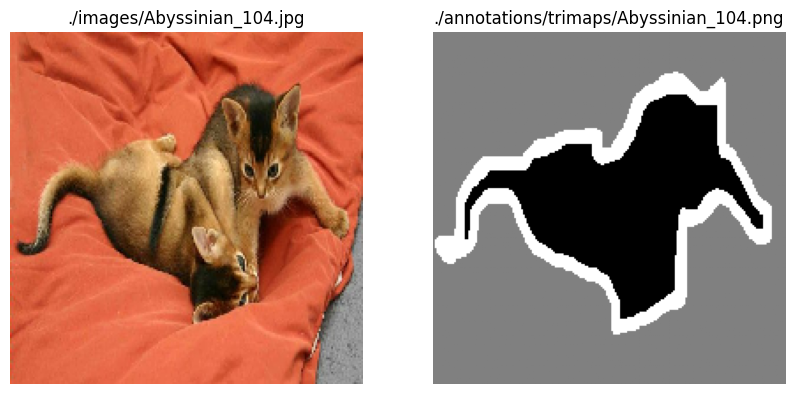

In [34]:
image_file = './images/Abyssinian_104.jpg'
label_file = './annotations/trimaps/Abyssinian_104.png'
shape = (200, 200)

image = np.asarray(kutils.load_img(image_file, target_size=shape, color_mode='rgb'))
label = np.asarray(kutils.load_img(label_file, target_size=shape, color_mode='grayscale'))
show_images(image, label, image_file, label_file)

### Question 4.1- Showing information
* Requirements:
  1. Fil code to the cell followed to show the information as in the output cell
  2. Try to understand the output

In [11]:
print("Type:")
print(f"type(image): {type(image)}")
print(f"type(label): {type(label)}")
print("-"*50)
print("Shape:")
print(f"image.shape: {image.shape}")
print(f"label.shape: {label.shape}")
print("-"*50)
print("Element type:")
print(f"image.dtype: {image.dtype}")
print(f"label.dtype: {image.dtype}")
print("-"*50)
print("Unique values:")
print(f"np.unique(image): {np.unique(image)}")
print(f"np.unique(label): {np.unique(label)}")



Type:
type(image): <class 'numpy.ndarray'>
type(label): <class 'numpy.ndarray'>
--------------------------------------------------
Shape:
image.shape: (200, 200, 3)
label.shape: (200, 200)
--------------------------------------------------
Element type:
image.dtype: uint8
label.dtype: uint8
--------------------------------------------------
Unique values:
np.unique(image): [0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 90  91  92  93  94  95  96  97  98  99  100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 

### Question 4.2- Creating masks and selecting items (I)
* Information:
  * Array ``label`` has 3 unique values: 0,1,2; where,
    * 1: marking pixels of animals
    * 2: marking pixels of the boundary
    * 3: marking pixels in the background

* Requirements:
  1. Create a mask of pixels that does not belong to animals
  2. Create a new array named ``new_image`` copied from ``image``
  3. Mark all the pixels corresponding to the mask with value: [100, 100, 100] (i.e., gray color)
  4. Show ``new_image`` with function ``show_image`` defined above, see the figure below

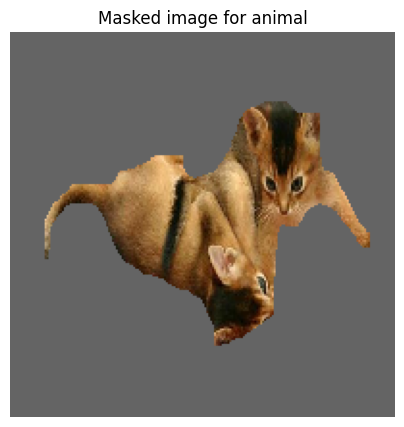

In [12]:
mask = label > 1 
new_image = image.copy()

new_image[mask] = [100, 100, 100]
show_image(new_image, title="Masked image for animal")



### Question 4.3- Creating masks and selecting (II)
* Information:
  * Array ``label`` has 3 unique values: 0,1,2; where,
    * 1: marking pixels of animals
    * 2: marking pixels of the boundary
    * 3: marking pixels in the background

* Requirements:
  1. Create a mask of pixels that does not belong to the background
  2. Create a new array named ``new_image`` copied from ``image``
  3. Mark all the pixels corresponding to the mask with value: [100, 100, 100] (i.e., gray color)
  4. Show ``new_image`` with function ``show_image`` defined above, see the figure below

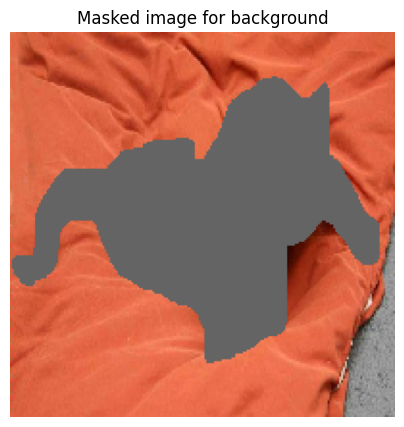

In [48]:
mask_1 = label == 1
mask_2 = label == 3
gray_animal = image.copy()

gray_animal[mask_1] = [100, 100, 100]
gray_animal[mask_2] = [100, 100, 100]

show_image(gray_animal, title="Masked image for background")

# 2 == background
# 3 == boundary 
# 1 == animal 


### Question 4.3- Creating masks and selecting (III)
* Information:
  * Array ``label`` has 3 unique values: 0,1,2; where,
    * 1: marking pixels of animals
    * 2: marking pixels of the boundary
    * 3: marking pixels in the background
  * Shape of ``label`` is (200, 200); shape of ``new_label`` is (200, 200, 3).

* Requirements:
  1. Creat masks from ``label`` for each unique value 0,1 and 2
  2. Use those masks to assign colors of pixels belong to animals, boundary, and background as follows:
    * animals: [0, 0, 200] (blue)
    * background: [100, 100, 100] (gray)
    * boundary: [255, 255, 255] (white)
  3. Show ``new_label`` to have the picture as shown below

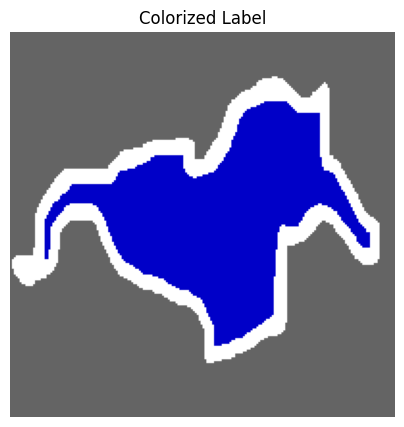

In [49]:
new_label = label.repeat(3).reshape(*label.shape, -1)
mask_animals = label == 1 
mask_background = label == 2
mask_boundary = label == 3 

new_label[mask_animals] = [0, 0, 200]
new_label[mask_background] = [100, 100, 100]
new_label[mask_boundary] = [255, 255, 255]

show_image(new_label, title="Colorized Label")



# 2-Indexing - (II)

## 2.1 Example
* To select items with the index for each dimension given in array: ``X[row_idx, col_idx]``

In [50]:
N, M = 4, 10
np.random.seed(0)
X = np.random.randint(0, 50, (N, N))
row_idx = [0, 1, 1, 3]
col_idx = [2, 2, 3, 1]

print('X: '); print(X)
print('row_idx: ', row_idx)
print('col_idx: ', col_idx)
print('-'*150)
print('Coordinates created from row_idx and col_idx are:')
print([pair for pair in zip(row_idx, col_idx)])
print("To select items with the above coordinates: ", X[row_idx, col_idx])

X: 
[[44  47  0   3  ]
 [3   39  9   19 ]
 [21  36  23  6  ]
 [24  24  12  1  ]]
row_idx:  [0, 1, 1, 3]
col_idx:  [2, 2, 3, 1]
------------------------------------------------------------------------------------------------------------------------------------------------------
Coordinates created from row_idx and col_idx are:
[(0, 2), (1, 2), (1, 3), (3, 1)]
To select items with the above coordinates:  [0   9   19  24 ]


## Question 1- Select the main diagonal and the secondary diagonal in a matrix

In [53]:
N, M = 4, 10
np.random.seed(0)
X = np.random.randint(0, 50, (N, N))
row_idx = [0, 1, 1, 3]
col_idx = [2, 2, 3, 1]

print('X: '); print(X)
print('-'*150)

print(f"items in the main diagonal: {np.diag(X)}")
print(f"items in the secondary diagonal: {np.diag(np.fliplr(X))[::-1]}")


X: 
[[44  47  0   3  ]
 [3   39  9   19 ]
 [21  36  23  6  ]
 [24  24  12  1  ]]
------------------------------------------------------------------------------------------------------------------------------------------------------
items in the main diagonal: [44  39  23  1  ]
items in the secondary diagonal: [24  36  9   3  ]


## Question 2-
* Information:
  * Assume that,
    * ```X``` and ```t`` are a matrix and vector as follows.
    * The length of ```t``` is the same size of the first dimension of X, i.e., 8
    * All the values inside of ```t``` is valid indices in the second dimension of ```X```, i.e., within ```[0, 3]```
  
  

```
X:
[[64  67  84  87 ]
 [87  29  41  56 ]
 [90  32  78  85 ]
 [59  66  57  45 ]
 [97  92  29  40 ]
 [89  67  84  69 ]
 [49  39  39  34 ]
 [59  52  85  29 ]]
t: [1, 0, 3, 0, 1, 1, 2, 3]
```
* Requirements:
  1. Select items in X as follows:
    * t[0] = 1 => select the item X[row=0, col=1]
    * t[1] = 0 => select the item X[row=1, col=0]
    * t[2] = 3 => select the item X[row=2, col=3]
    *
    * t[7] = 3 => select the item X[row=7, col=3]
  2. Show the results as in the output cell followed
  3. Assign the selected items in X to ```999```
  4. Print X

In [61]:
N, M = 8, 4
np.random.seed(0)
X = np.random.randint(20, 99, (N, M))
t = np.array([1, 0, 3, 0, 1, 1, 2, 3])
print('X: '); print(X)
print('t: ', t)
print('-'*150)
list_index = [i for i in range(len(t))]
print(f"The selected items are: {X[list_index, t]}")
X[list_index, t] = 0
print(f"Ater updating with 0, X =")
print(X)


X: 
[[64  67  84  87 ]
 [87  29  41  56 ]
 [90  32  78  85 ]
 [59  66  57  45 ]
 [97  92  29  40 ]
 [89  67  84  69 ]
 [49  39  39  34 ]
 [59  52  85  29 ]]
t:  [1   0   3   0   1   1   2   3  ]
------------------------------------------------------------------------------------------------------------------------------------------------------
The selected items are: [67  87  85  59  92  67  39  29 ]
Ater updating with 0, X =
[[64  0   84  87 ]
 [0   29  41  56 ]
 [90  32  78  0  ]
 [0   66  57  45 ]
 [97  0   29  40 ]
 [89  0   84  69 ]
 [49  39  0   34 ]
 [59  52  85  0  ]]


## Question 3- compute confusion matrix
* Confusion matrix, meaning: [https://en.wikipedia.org/wiki/Confusion_matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
* Confusion matrix, from library:
  * SKLEARN: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
def confusion_matrix(y_test, y_pred, nclasses=2):

  pass


In [19]:
# RUN THIS CELL TO TEST YOUR ANSWER
from sklearn.datasets import load_iris
import sklearn.metrics as metrics

#Load dataset: iris from sklearn
X, y = load_iris(return_X_y=True)
# Assume that y_test = y; and y_pred = y (with 10 errors)
y_test = y
y_pred = y.copy()
np.random.seed(0)
selected = np.random.randint(0, len(y), 10)
y_pred[selected] = (y_pred[selected]  + 1)%3 # 3 classes

#
C = confusion_matrix(y_test, y_pred, nclasses=3)
print("Your confusion matrix:"); print(C)
C_sk = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix using sklearn:"); print(C_sk)

ModuleNotFoundError: No module named 'sklearn'

## Question 4 - compute crossentropy loss
* References:
  * CrossEntropyLoss: [https://machinelearningmastery.com/cross-entropy-for-machine-learning/](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
  * Tensorflow's CrossEntropy Loss: [https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
* Requirements:
  * Fill your code to function ```crossentropy``` below to define the crossentropy loss
    * ```mode=mean``` => return the averaged loss
    * ``mode=sum``` => return sum of losses
    * other mode => raise an exception

In [ ]:
import sys
def crossentropy(predictions, target, mode='mean'):
  #YOUR CODE IS HERE


  pass



In [ ]:
# RUN THIS CELL TO TEST YOUR ANSWER
import tensorflow as tf

y_true = np.array([1, 2])
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])

loss1 = crossentropy(y_pred, y_true)

scce = tf.keras.losses.SparseCategoricalCrossentropy()
loss2 = scce(y_true, y_pred).numpy()

print("Your Crossentropy loss: ", loss1)
print("Tensfor's Crossentropy loss: ", loss2)
print("Almost close: ", np.allclose(loss1, loss2))

Your Crossentropy loss:  1.1769391936907967
Tensfor's Crossentropy loss:  1.1769392436907955
Almost close:  True
